# Basics

### Task 1 : create a Linear Dataset

In [1]:
import numpy as np

In [2]:
feature=np.arange(6,21)
print(feature)

[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [3]:
label=feature*3+4
print(label)

[22 25 28 31 34 37 40 43 46 49 52 55 58 61 64]


### Task 2 : Add some noise to the Dataset

In [4]:
noise=2*(2*np.random.random(label.size)-1)
print(noise)

[-0.99996125  0.98513045 -1.46563354 -1.0109619   0.1267497  -0.63436629
 -1.36083684 -1.59727189  1.57177026 -1.2684053   1.48615404 -1.62370501
  0.9805979   0.19308436 -1.57394429]


In [5]:
label=feature*3+4+noise

In [6]:
print(label)

[21.00003875 25.98513045 26.53436646 29.9890381  34.1267497  36.36563371
 38.63916316 41.40272811 47.57177026 47.7315947  53.48615404 53.37629499
 58.9805979  61.19308436 62.42605571]


# Linear Regression with Synthetic Data

In [7]:
import tensorflow as tf

In [8]:
import pandas as pd

In [9]:
from matplotlib import pyplot as plt

### Functions definition :
`build_model(the_learning_rate)` build an empty model

`train_model(model, feature, label, epoch)` train the model with examples (features and label)

In [21]:
#@title Define the functions that build and train a model
def build_model(the_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=the_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  #squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


### Plotting functions definitions

In [23]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


### Defining dataset

In [28]:
my_feature = [1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0]
my_label   = [5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2]

### Specify hyperparameters, Build, Train and Plot

Epoch 1/6
2/2 [==============================] - 0s 7ms/step - loss: 836.3609 - root_mean_squared_error: 28.9199
Epoch 2/6
2/2 [==============================] - 0s 0s/step - loss: 9.5524 - root_mean_squared_error: 3.0907
Epoch 3/6
2/2 [==============================] - 0s 3ms/step - loss: 1.5872 - root_mean_squared_error: 1.2598
Epoch 4/6
2/2 [==============================] - 0s 3ms/step - loss: 1.5221 - root_mean_squared_error: 1.2337
Epoch 5/6
2/2 [==============================] - 0s 3ms/step - loss: 1.5005 - root_mean_squared_error: 1.2249
Epoch 6/6
2/2 [==============================] - 0s 3ms/step - loss: 1.5305 - root_mean_squared_error: 1.2372


C:\Users\Antoine\Documents\miniconda3\envs\google_ml\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


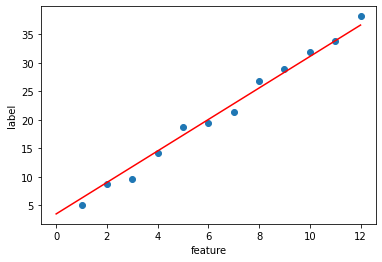

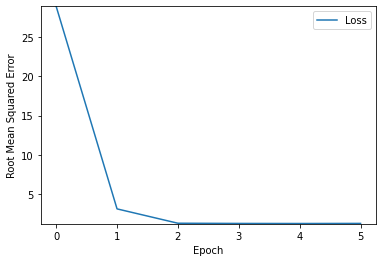

In [33]:
learning_rate=1.0
epochs=6
my_batch_size=8

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)